In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from util import images_in_directory
import binary_image

In [2]:
binary_images = [binary_image.filter(image) for image in images_in_directory('output_images/bird_view')] 
binary = binary_images[0]

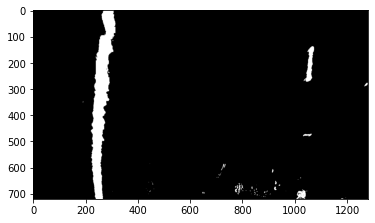

In [3]:
plt.imshow(binary.to_rgb_image())

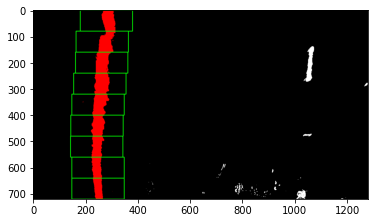

In [4]:
(left_x, right_x) = binary.lane_bases()
left_lane = binary_image.Lane(binary, left_x)
rgb_image = binary.to_rgb_image()
for w in left_lane.all_windows:
    w.draw_on_image(rgb_image, [255, 0, 0])
plt.imshow(rgb_image)

In [7]:
all_windows = [window for window in left_lane.all_windows]
all_windows

In [23]:
nonzero_xys = [w.nonzero_xy for w in all_windows]
(left_x, left_y) = (np.concatenate([nonzero_xy[0] for nonzero_xy in nonzero_xys]), np.concatenate([nonzero_xy[1] for nonzero_xy in nonzero_xys]))

In [26]:
(a,b,c) = np.polyfit(left_y, left_x, 2)


TypeError: savefig() missing 1 required positional argument: 'fname'

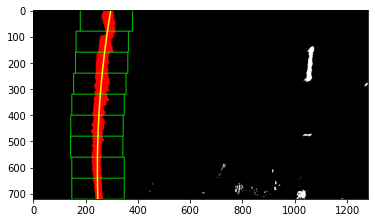

In [30]:
ploty = np.linspace(0, binary.binary_image.shape[0]-1, binary.binary_image.shape[0] )
plotx = a*ploty**2 + b*ploty + c
plt.imshow(rgb_image)
plt.plot(plotx, ploty, color='yellow')
plt.savefig('test.jpg')

In [40]:
points = np.int_(np.array([np.transpose(np.vstack([plotx, ploty]))]))

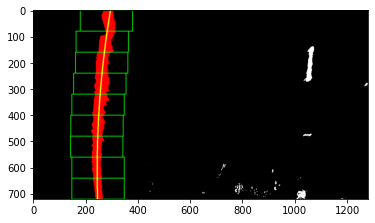

In [47]:
cv2.polylines(rgb_image, points, False, [255, 255,0], 3)
plt.imshow(rgb_image)

In [41]:
points

array([[[296,   0],
        [295,   1],
        [295,   2],
        ...,
        [246, 717],
        [246, 718],
        [246, 719]]])

In [45]:
np.flipud(points[0])

array([[246, 719],
       [246, 718],
       [246, 717],
       ...,
       [295,   2],
       [295,   1],
       [296,   0]])

In [77]:
np.average([(1,2,3), (4,2,6)], axis=0, weights=(range(2)))

array([4., 2., 6.])

In [52]:
[1,2,3][-5:]

[1, 2, 3]

In [75]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])